# Chapter 15 - Black Litterman

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import inv

In [2]:
# Read CSV
import pandas as pd
data = pd.read_csv("/Volumes/GoogleDrive/My Drive/FM5/Chapt_15_data.csv", dtype={'col1':'str'})
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.sort_index(ascending=True)

In [3]:
monthly_ret = np.log(data)
monthly_ret = monthly_ret.diff().dropna()

In [4]:
# Market Capitalization ($B)
tickers = ['AAPL','MSFT','AMZN','GOOG','KO','JNJ','PG','DIS','WMT','XOM']
market_cap = pd.Series([1370, 1358, 1043, 1020, 257.356, 395.024, 312.879, 250.902, 336.433, 250.356],
                      index = tickers)

### 12.2  A Naive Problem

In [5]:
# Input: Current T-Bill rate
t_bill_r = 0.016/12  

In [6]:
# Comupte Benchmark Proportion
bench_prop = market_cap / np.sum(market_cap)
print("Benchmark Proportions")
print(bench_prop)

Benchmark Proportions
AAPL    0.207766
MSFT    0.205946
AMZN    0.158175
GOOG    0.154687
KO      0.039029
JNJ     0.059907
PG      0.047449
DIS     0.038050
WMT     0.051021
XOM     0.037968
dtype: float64


In [7]:
# Copute Returns Statistics
mean_ret = np.array(monthly_ret.mean())
sd_ret = np.array(monthly_ret.std())
cov_mat = monthly_ret.cov()

In [8]:
optimal_port = np.dot(inv(cov_mat),(mean_ret - t_bill_r))
optimal_port = optimal_port / np.sum(optimal_port)
print("Optimal Portfolio")
print(pd.Series(optimal_port, index = tickers))

Optimal Portfolio
AAPL    0.202810
MSFT    0.143080
AMZN    0.239175
GOOG   -0.060852
KO      0.040303
JNJ     0.208575
PG      0.346464
DIS     0.263657
WMT     0.065269
XOM    -0.448481
dtype: float64


### 12.4  Black-Litterman Step 1:  What Does the Market Think?

#### Optimization With Normalizing

In [9]:
# Input
bench_ret = 0.12/12 # anticipated benchmark return
t_bill_r = 0.016/12 # Current T-Bill rate

In [10]:
# Normalizing Factor
norm_fact = (bench_ret - t_bill_r) / np.dot(np.dot(bench_prop,cov_mat),bench_prop)
print("Normalizing Factor")
print(norm_fact)

Normalizing Factor
4.957130100941868


In [11]:
# Market Expected Returns
exp_ret = np.dot(cov_mat,bench_prop) * norm_fact + t_bill_r
np.dot(bench_prop,exp_ret) # check
print("Market Expected Returns - Check")
print(np.dot(bench_prop,exp_ret))

Market Expected Returns - Check
0.009999999999999998


In [12]:
# Additional Check: Optimal Portfolio
check_proportions = np.dot(inv(cov_mat),(exp_ret - t_bill_r)) / np.sum(np.dot(inv(cov_mat),(exp_ret - t_bill_r))) #proportions
print("Additional Check: Optimal Portfolio")
print(pd.Series(check_proportions,index=tickers))

Additional Check: Optimal Portfolio
AAPL    0.207766
MSFT    0.205946
AMZN    0.158175
GOOG    0.154687
KO      0.039029
JNJ     0.059907
PG      0.047449
DIS     0.038050
WMT     0.051021
XOM     0.037968
dtype: float64


### 12.5  BL Step 2:  Introducing Opinions-What Does Joanna Think?

In [13]:
# Input: Analyst opinion - Delta
delta_GOOG = 0.007

In [14]:
# Returns adjusted for opinions
opn_adj_ret = exp_ret + delta_GOOG * cov_mat["GOOG"] / cov_mat.loc["GOOG","GOOG"]
print("Returns adjusted for opinions")
print(opn_adj_ret)

Returns adjusted for opinions
AAPL    0.014997
MSFT    0.014014
AMZN    0.017173
GOOG    0.017916
KO      0.006618
JNJ     0.006250
PG      0.004602
DIS     0.010014
WMT     0.005044
XOM     0.007880
Name: GOOG, dtype: float64


In [15]:
# Opinion-adjusted optimized portfolio
opn_adj_prop = np.dot(inv(cov_mat),(opn_adj_ret - t_bill_r))
opn_adj_prop = opn_adj_prop / np.sum(opn_adj_prop)
print("Opinion-adjusted optimized portfolio")
print(pd.Series(opn_adj_prop,index=tickers))

Opinion-adjusted optimized portfolio
AAPL    0.154804
MSFT    0.153448
AMZN    0.117854
GOOG    0.370169
KO      0.029080
JNJ     0.044636
PG      0.035354
DIS     0.028351
WMT     0.038015
XOM     0.028289
dtype: float64


In [16]:
# The Black-Litterman Tracking Matrix
track_mat = cov_mat / np.diag(cov_mat)
print("The Black-Litterman Tracking Matrix")
print(track_mat)

The Black-Litterman Tracking Matrix
          AAPL      MSFT      AMZN      GOOG        KO       JNJ        PG  \
AAPL  1.000000  0.482559  0.315103  0.388253  0.361586  0.342721  0.346389   
MSFT  0.325964  1.000000  0.309935  0.450307  0.547445  0.504710  0.315919   
AMZN  0.369479  0.538007  1.000000  0.579943  0.647781  0.616815 -0.062984   
GOOG  0.300626  0.516180  0.382966  1.000000  0.552300  0.336807  0.370155   
KO    0.101305  0.227059  0.154779  0.199840  1.000000  0.471320  0.394722   
JNJ   0.105785  0.230624  0.162368  0.134262  0.519253  1.000000  0.445640   
PG    0.096068  0.129709 -0.014897  0.132583  0.390740  0.400421  1.000000   
DIS   0.212782  0.400058  0.208859  0.346964  0.502476  0.433046  0.315891   
WMT   0.106328  0.143088  0.075414  0.088863  0.487888  0.497973  0.405414   
XOM   0.158337  0.298941  0.174739  0.227456  0.431895  0.620851  0.337769   

           DIS       WMT       XOM  
AAPL  0.343520  0.245287  0.336816  
MSFT  0.436276  0.222972  0.429

#### Two or More Opinions

In [17]:
# Input: Analyst opinion - Delta ARRAY
delta_port = pd.Series([0.000, 0.000, 0.000, 0.007, 0.000, 0.000, 0.000, -0.004, 0.000, 0.000], index=tickers)

In [18]:
# Returns adjusted for opinions
opn_adj_ret = exp_ret + np.dot(track_mat,delta_port)
print("Returns adjusted for opinions")
print(pd.Series(opn_adj_ret,index=tickers))

Returns adjusted for opinions
AAPL    0.013623
MSFT    0.012269
AMZN    0.015592
GOOG    0.016181
KO      0.005709
JNJ     0.005387
PG      0.004036
DIS     0.006014
WMT     0.004321
XOM     0.006265
dtype: float64


In [19]:
# Opinion-adjusted optimized portfolio
opn_adj_prop = np.dot(inv(cov_mat),(opn_adj_ret - t_bill_r))
opn_adj_prop = opn_adj_prop / np.sum(opn_adj_prop)
print("Opinion-adjusted optimized portfolio")
print(pd.Series(opn_adj_prop,index=tickers))

Opinion-adjusted optimized portfolio
AAPL    0.189267
MSFT    0.187610
AMZN    0.144092
GOOG    0.452578
KO      0.035554
JNJ     0.054573
PG      0.043225
DIS    -0.187965
WMT     0.046479
XOM     0.034587
dtype: float64


#### Do You Believe in Your Opinions?

In [20]:
# Input: Opinion Confidence
conf = 0.6

In [21]:
# Returns adjusted for opinions and confidence
conf_adj_ret = conf * opn_adj_ret + ( 1 - conf ) * exp_ret
print("Returns adjusted for opinions and confidence")
print(pd.Series(conf_adj_ret,index=tickers))

Returns adjusted for opinions and confidence
AAPL    0.013085
MSFT    0.011707
AMZN    0.014600
GOOG    0.014075
KO      0.005513
JNJ     0.005356
PG      0.003892
DIS     0.006642
WMT     0.004361
XOM     0.006274
dtype: float64


In [22]:
# Opinion and confidence adjusted
conf_adj_prop = np.dot(inv(cov_mat),(conf_adj_ret - t_bill_r))
conf_adj_prop = conf_adj_prop / np.sum(conf_adj_prop)
print("Opinion and confidence adjusted")
print(pd.Series(conf_adj_prop,index=tickers))

Opinion and confidence adjusted
AAPL    0.196257
MSFT    0.194538
AMZN    0.149413
GOOG    0.340023
KO      0.036867
JNJ     0.056589
PG      0.044821
DIS    -0.102567
WMT     0.048195
XOM     0.035864
dtype: float64


### 12.6  Using Black-Litterman for International Asset Allocation

In [23]:
# Read CSV
import pandas as pd
data = pd.read_csv("/Volumes/GoogleDrive/My Drive/FM5/Chapt_15_data_2.csv", dtype={'col1':'str'})
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.sort_index(ascending=True)
monthly_returns = np.log(data)
monthly_returns = monthly_returns.diff().dropna()

In [24]:
# Input: Weights
tickers=['GSPC','ACWI','RUT','EEM','BND']
weights = pd.Series([0.3,0.2,0.04,0.04,0.42],index=tickers)

In [25]:
# Compute statistics
cor_mat = monthly_returns.corr() # Correlation matrix
sd_ret = np.array(monthly_returns.std()) * np.sqrt(12)
cov_mat = np.cov(monthly_returns.T) * 12

In [26]:
# Standard deviation of composite
sd_composite = np.sqrt(np.dot(np.dot(weights,cov_mat),weights))
print("Standard deviation of composite")
print(sd_composite)

Standard deviation of composite
0.06906767647382618


In [27]:
# Input: 
rF = 0.01 # risk free rate
r_SP = 0.10 # Expected return on S&P 500

In [28]:
# Implied Returns
implied_ret = pd.Series(np.dot(cov_mat,weights), index=tickers)
implied_ret = (implied_ret * ( r_SP - rF ) ) / implied_ret.loc["GSPC"] + rF
print("Implied Returns")
print(implied_ret)

Implied Returns
GSPC    0.100000
ACWI    0.102991
RUT     0.092152
EEM     0.115901
BND     0.013045
dtype: float64


<AxesSubplot:title={'center':'Expected Returns for Asset Classes'}, ylabel='Expected return'>

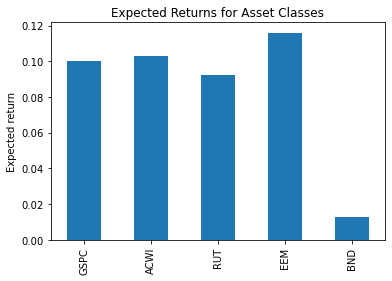

In [29]:
implied_ret.plot(kind='bar',title = "Expected Returns for Asset Classes", ylabel= "Expected return")